# Module 1: Introduction to Exploratory Data Analysis 

## Step 3:  Explore

In this notebook we dive into some plotting methods commonly used for Exploratory Data Analysis (EDA). 

Our [goals for EDA](http://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm) are to open-mindedly explore the data, and see what insights we may find. 

The purpose of the EDA approach is to:
- maximize insight into a data set;
- uncover underlying structure;
- extract important variables;
- detect outliers and anomalies;
- test underlying assumptions;
- develop parsimonious models; and
- determine optimal factor settings.


In this notebook we will create and examine these graphical techniques:

2. [Scatter Plot](#scatterplot)

3. [Scatter Matrix](#scattermatrix)

4. [Heat map](#heatmap)

5. [Histogram](#histogram)

6. [Bar Plot](#barplot)

7. [Box Plot](#boxplot)

### Setup
<a id='setup'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import re

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

With a fresh notebook, we read in our clean dataset again.

In [2]:
data_path = '../data/'
data_path = 'C:/Users/kevin pan/Dropbox/dev/kiva_/input/'
df = pd.read_csv(data_path+'df.csv', low_memory=False)

### 1. Scatter plot
<a id='scatterplot'></a>

A scatter plot reveals the relationship between two numeric variables. 

Let's choose two numeric variables to plot:

In [15]:
## Uncomment to see a list of numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
# print(numeric_vars)

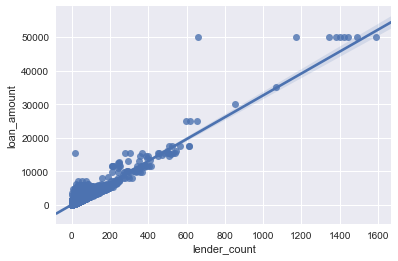

In [6]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)

Perhaps unsurprisingly, we see that loan amount correlates pretty well with the lender count. 

### 2. Scatter Matrix
<a id='scattermatrix'></a>

A scatterplot matrix is useful for seeing several variable comparisons at once! 

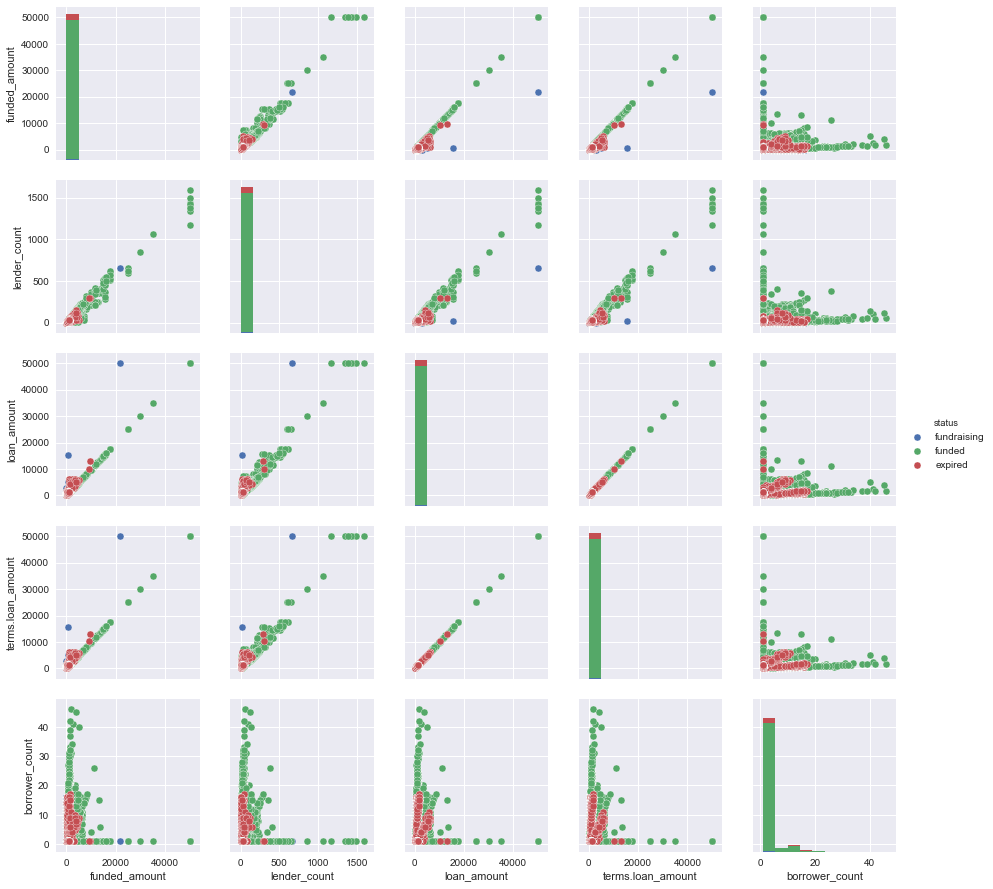

In [39]:
## Let's use a regular expressions search to find some variables to plot
r = re.compile('.*amount|.*count')
selected_vars = filter(r.match, numeric_vars)
# print(list(selected_vars))

num_df = df[['funded_amount', 'lender_count', 'loan_amount', 'terms.loan_amount', 'borrower_count', 'status']]

## Remove the NaN rows so Seaborn can plot
num_df = num_df.dropna(axis=0, how='any')
# num_df.describe()

## Select the first 6 columns to plot 
sns.pairplot(num_df, hue = 'status')

Great! So we see the distributions of most of these variables are clustered on the low end for most of these variables, with a slightly wider spread for borrower count. 

Furthermore, and quite important, we notice loan amount and terms.loan_amount look exactly the same! For modeling purposes, we should not use both of these due to issues with multicollinearity (discussed later in the linear regression notebook). 


### 3. Heat Map
<a id='heatmap'></a>

Let's check out where some big loans are happening!

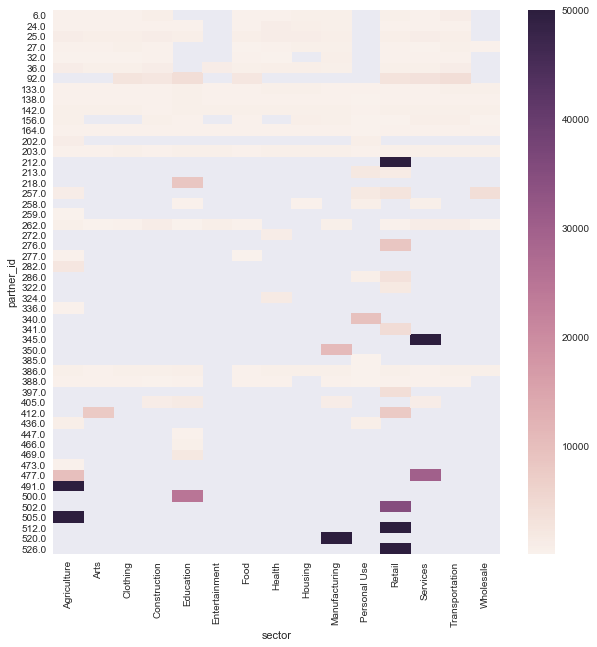

In [26]:
## Let's total up means by partner and sector
partner_sector_means = df.groupby(["partner_id", "sector"]).mean().reset_index()
partner_sector_means = partner_sector_means[["partner_id", "sector", "loan_amount"]].pivot("partner_id", "sector", "loan_amount")

## Make the plot larger
fig, ax = plt.subplots(figsize=(10,10))   
ax = sns.heatmap(partner_sector_means)

### 4. Histogram
<a id='histogram'></a>

C:\Users\kevin pan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


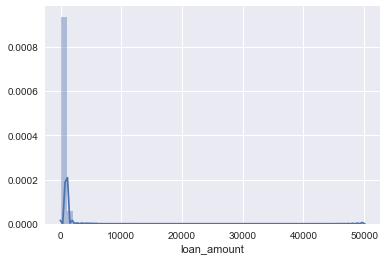

In [45]:
sns.distplot(df['loan_amount'].dropna(axis = 0))

C:\Users\kevin pan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


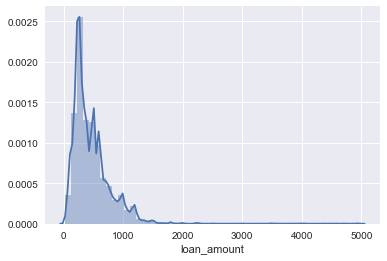

In [53]:
# Let's just look at those under 5K
small_loans_df = df[(df['loan_amount'] < 5000)]
sns.distplot(small_loans_df['loan_amount'])

### 5. Bar Plot
<a id='barplot'></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

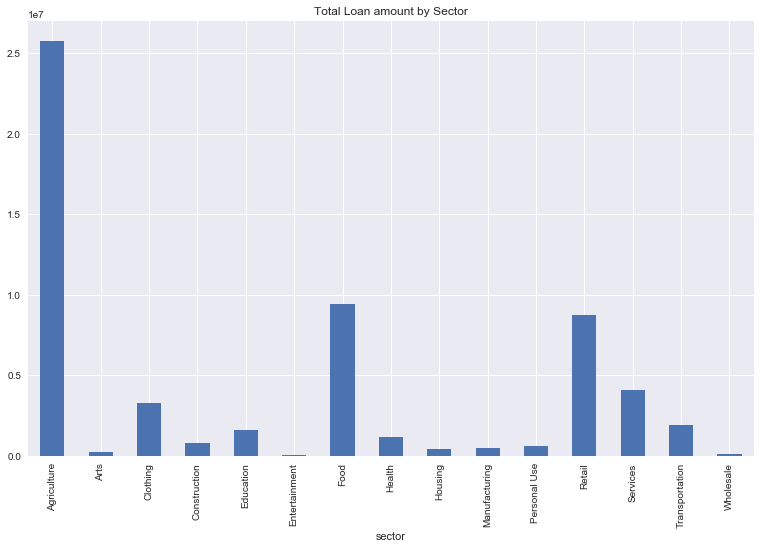

In [54]:
## TODO:: Convert to seaborn
df.groupby('sector')['loan_amount'].sum().plot(kind="bar", figsize=(13, 8), fontsize=10,title='Total Loan amount by Sector')

plt.xticks(rotation=90)

### 6. Box Plots
<a id='boxplot'></a>

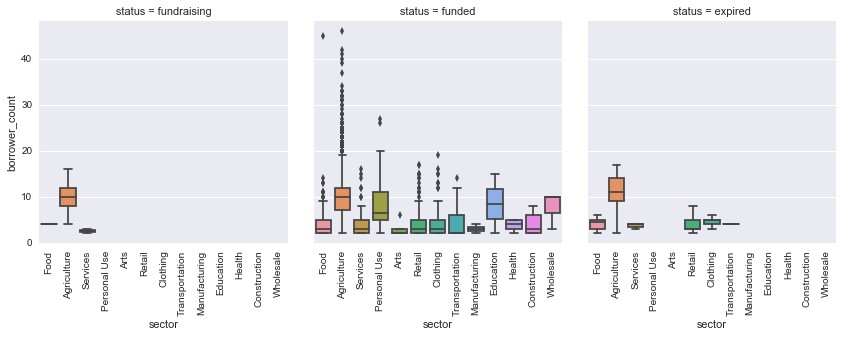

In [66]:
## What about a plot for where thre are multiple borrowers?
multi_borrower_loans = df[df["borrower_count"] > 1]

ax = sns.factorplot(x="sector", y="borrower_count", 
                    col = 'status', 
                    data=multi_borrower_loans[['status','borrower_count','sector']],
                   kind = "box")
## Rotate labels
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)

### Moving on

Next we move on to feature engineering, where we create variables from what we've found!